In [60]:
#Clasificacdor de arboles
from sklearn.tree import DecisionTreeClassifier
#2 De datos
from sklearn.datasets import load_breast_cancer, load_iris
#Función para dividir la data en entrenamiento y testing
from sklearn.model_selection import train_test_split
#Poder grafiar el arbol de decisiones que se genere
from sklearn.tree import export_graphviz
import graphviz 
import matplotlib.pyplot as plt
import numpy as np
import os 
import os 
os.environ["PATH"] += os.pathsep + 'D:/Program Files (x86)/Graphviz2.38/bin/'

In [61]:
#Pasar todo el set de datos a la variable
iris = load_iris()

In [62]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [63]:
#Generar 4 viarables sobre el set de datos
#Target son las etiquetas
#Data las caracteristicas
x_entrenamiento, x_test, y_entrenamiento, y_test = train_test_split(iris.data, iris.target)

In [64]:
#Variable arbol le pasamos el clasificador
arbol = DecisionTreeClassifier()

In [65]:
#Entrenamiento
arbol.fit(x_entrenamiento, y_entrenamiento)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [66]:
#Ver que también aprendio nuestro algoritmo y puede generar predicciones.arbol.score(x_entrenamiento, y_entrenamiento)
arbol.score(x_test, y_test)

1.0

In [67]:
#No es bueno que tenga un %100 es un sobre ajuste
arbol.score(x_entrenamiento, y_entrenamiento)

1.0

In [68]:
#Generar un archivo que contiene toda la información sobre nuestro arbol.
export_graphviz(arbol, out_file = 'arbol.dot', class_names = iris.target_names, feature_names = iris.feature_names, impurity = False, filled = True)

In [69]:
#Abrir el arbol de decisiones ya graficado
with open('arbol.dot') as f:
    dotg = f.read()
graphviz.Source(dotg).view()

ExecutableNotFound: failed to execute ['dot', '-Tpdf', '-O', 'Source.gv'], make sure the Graphviz executables are on your systems' PATH

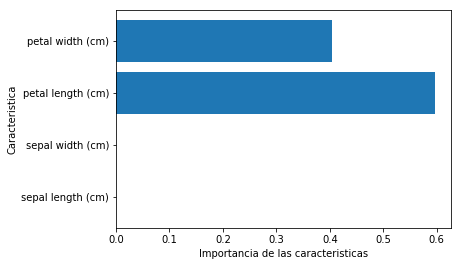

In [11]:
#Importancia de las caracteristicas para definir a que clase pertenecera de acuerdo al tamano del petalo
#Usando la longitud de los petalos se obtiene un gran porcentaje para poder clasificar los petalos
caract = iris.data.shape[1]
plt.barh(range(caract),arbol.feature_importances_)
plt.yticks(np.arange(caract),iris.feature_names)
plt.xlabel('Importancia de las caracteristicas')
plt.ylabel('Caracteristica')
plt.show()

In [12]:
#Sobreajustar no es bueno y para ello se mueven los parametros del clasificador
arbol = DecisionTreeClassifier(max_depth = 5)

In [13]:
#Se vuelve a entrenar la variable de arbol para quitar el sobreajuste
arbol.fit(x_entrenamiento, y_entrenamiento)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [15]:
#Se vuelve a realizar el test e igual con entrenamiento
arbol.score(x_test,y_test)

0.9473684210526315

In [16]:
arbol.score(x_entrenamiento,y_entrenamiento)

0.9821428571428571

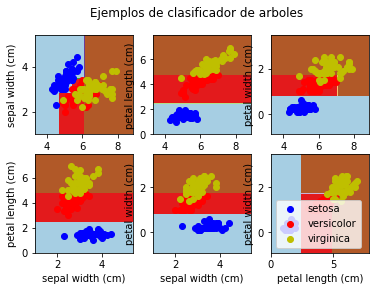

In [19]:
#Poder graficar como clasifico los petalos
n_classes=3
plot_colors='bry'
plot_step=0.02

for pairidx, pair in enumerate([[0,1],[0,2],[0,3],
                               [1,2],[1,3],[2,3]]):
    X=iris.data[:,pair]
    y=iris.target
    
    #entrena algoritmo
    clf=DecisionTreeClassifier(max_depth = 3).fit(X,y)
    plt.subplot(2,3,pairidx + 1)
    
    x_min, x_max=X[:,0].min() - 1, X[:,0].max() +1
    y_min, y_max=X[:,1].min() - 1, X[:,1].max() +1
    xx, yy=np.meshgrid(np.arange(x_min, x_max, plot_step),
                       np.arange(y_min, y_max, plot_step))
    Z=clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z=Z.reshape(xx.shape)
    cs=plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)
    
    plt.xlabel(iris.feature_names[pair[0]])
    plt.ylabel(iris.feature_names[pair[1]])
    plt.axis('tight')

    #plot puntos de entrenamiento
    for i, color in zip(range(n_classes), plot_colors):
        idx=np.where(y == i)
        plt.scatter(X[idx, 0], X[idx,1], c=color, label=iris.target_names[i],
                    cmap=plt.cm.Paired)
    plt.axis('tight')

plt.suptitle('Ejemplos de clasificador de arboles')

plt.legend()
plt.show()